# Linear Classifier (선형분류)

- 계산한 값이 0보다 작은 클래스는 -1, 0보다 크면 +1이라고 예측(분류)
> ŷ = w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b > 0 <br>
> Linear Regression와 매우 비슷하지만 가중치(w) 합을 사용하는 대신 예측한 값을 임계치 0 과 비교

- 이진 선형 분류기는 선, 평면, 초평면을 이용하여 2개의 클래스를 구분하는 분류기


경사하강법(Gradient Descent) 최적화 알고리즘을 사용하여 선형 모델을 작성

[SGDClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

```
SGDClassifier(alpha, average, class_weight, epsilon, eta0, fit_intercept, l1_ratio, learning_rat, loss, max_iter, n_iter, n_jobs, penalty, power_t, random_state, shuffle, tol, verbose, warm_start)
```
확률적 경사하강법(SGD, Stochastic Gradient Descent)을 이용하여 선형모델을 구현

- lossstr : 손실함수 (default='hinge')
- penalty : {'l2', 'l1', 'elasticnet'}, default='l2'
- alpha : 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)
- l1_ratio : L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default=True)
- max_iter : 계산에 사용할 작업 수 (default=1000)
- tol : 정밀도
- shuffle : 에포크 후에 트레이닝 데이터를 섞는 유무 (default=True)
- epsilon : 손실 함수에서의 엡실론, 엡실론이 작은 경우, 현재 예측과 올바른 레이블 간의 차이가 임계 값보다 작으면 무시 (default=0.1)
- n_jobs : 병렬 처리 할 때 사용되는 CPU 코어 수
- random_state : 난수 seed 설정
- learning_rate : 학습속도 (default='optimal')
- eta0 : 초기 학습속도 (default=0.0)
- power_t : 역 스케일링 학습률 (default=0.5)
- early_stopping : 유효성 검사 점수가 향상되지 않을 때 조기 중지여부 (default=False)
- validation_fraction : 조기 중지를위한 검증 세트로 설정할 교육 데이터의 비율 (default=0.1)
- n_iter_no_change : 조기중지 전 반복횟수 (default=5)
- class_weight : 클래스와 관련된 가중치 {class_label: weight} or “balanced”, default=None
- warm_start : 초기화 유무 (default=False)
- average : True로 설정하면 모든 업데이트에 대한 평균 SGD 가중치를 계산하고 결과를 coef_속성에 저장 (default=False)


#### LinearClassifier 실습 01

붓꽃 데이터 셋에 선형분류 적용

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris)) 

<class 'sklearn.utils.Bunch'>


In [ ]:
iris.feature_names

In [2]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
X,y = iris.data,iris.target

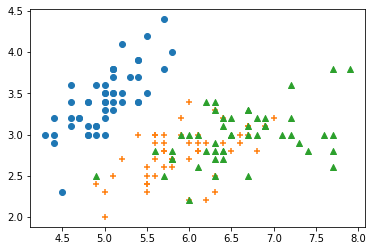

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
X2 = X[:,:2]
markers = ['o', '+', '^']
for i in range(3):
  xs = X2[:, 0][y == i]
  ys = X2[:, 1][y == i]
  plt.scatter(xs, ys, marker=markers[i])

In [16]:
y2=y.copy()
y2[(y2 == 2)] = 1
y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X2,y2,random_state=0, test_size= 0.5)

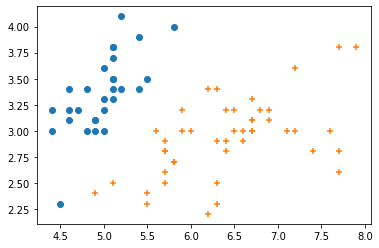

In [19]:
markers = ['o', '+', '^']
for i in range(3):
  xs = X_train[:, 0][y_train == i]
  ys = X_train[:, 1][y_train == i]
  plt.scatter(xs, ys, marker=markers[i])

In [20]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

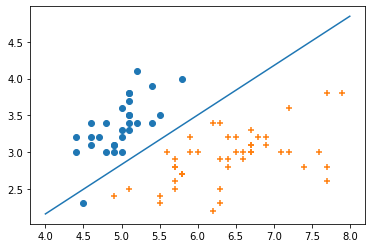

In [26]:
import numpy as np
w1 = model.coef_[0,0]
w2 = model.coef_[0,1]
b = model.intercept_
xx = np.linspace(4,8,50)
yy = -(w1 * xx + b)/ w2

markers = ['o', '+', '^']
for i in range(3):
  xs = X_train[:, 0][y_train == i]
  ys = X_train[:, 1][y_train == i]
  plt.scatter(xs, ys, marker=markers[i])

plt.plot(xx,yy)

* -(a* xx + c) / b 이렇게 표현할 수도 있습니다.
* -는 기울기가 위에서 아래방향으로 향하게 되므로 반대로 바꾸기 위해 '/' 주었습니다.
* b로 나눈것은 꽂받침 길이의 가중치를(a), 넓이의 가중치(b) 비율로 선을 긋기 위해서입니다.
* 그래서 두 가중치 비율만큼의 경계선에 선이 그려지게 됩니다.
* $[x_2 = -{{a}\over{b}} x_1 - {{c}\over{b}}]$ <=> $[yy = -{{a}\over{b}} xx - {{c}\over{b}}]$

#### 4개 속성 모두 이용

세가지 꽃 구분

In [33]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

iris = datasets.load_iris()

X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)

model=SGDClassifier(random_state=41)
model.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=41, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.9553571428571429, 0.9210526315789473)